Q2

PART A

In [47]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [48]:
def delete_noise(image):

    dnoise = image.copy()    
    himg = dnoise.shape[0]
    wimg = dnoise.shape[1]
    
    # Convert to frekans domain
    dnoise = np.fft.fft2(dnoise)
    plt.imshow(np.abs(dnoise), norm=LogNorm(vmin=5))
    plt.title("noisy image in domian frekans")
    plt.show()
    
    # Remove 76% of middle frekas and keep 12% of begin and 12% of end frekans (for of circularity of frekans)
    ratio = 0.12
    dnoise[:, int(wimg * ratio):int(wimg * (1 - ratio))] = 0
    dnoise[int(himg * ratio):int(himg * (1 - ratio))] = 0
    plt.imshow(np.abs(dnoise), norm=LogNorm(vmin=4))
    plt.title("noisy image in after ignore some frekans")    
    plt.show()
    
    # Convert to space domain
    dnoise = np.fft.ifft2(dnoise).real
    return dnoise

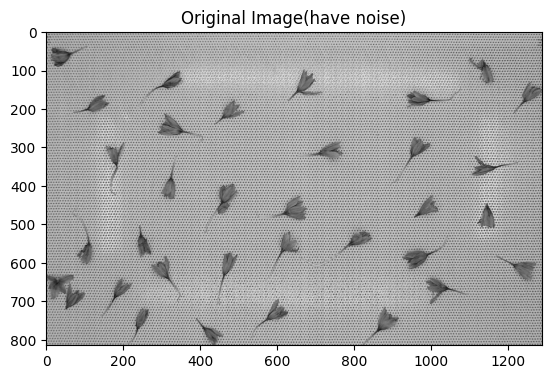

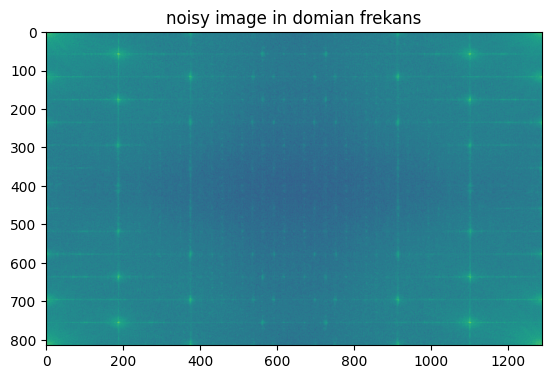

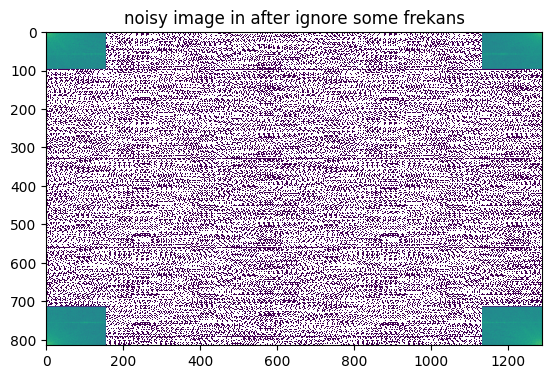

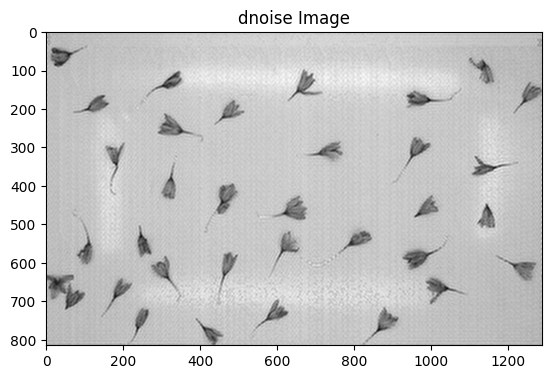

In [49]:
noisy_image = cv2.imread("./images/saffrun.jpg", 0)
plt.imshow(noisy_image, cmap="gray")
plt.title("Original Image(have noise)")
plt.show()

dnoise_image = delete_noise(noisy_image)
plt.imshow(dnoise_image, cmap="gray")
plt.title("dnoise Image")
plt.show()

PART B

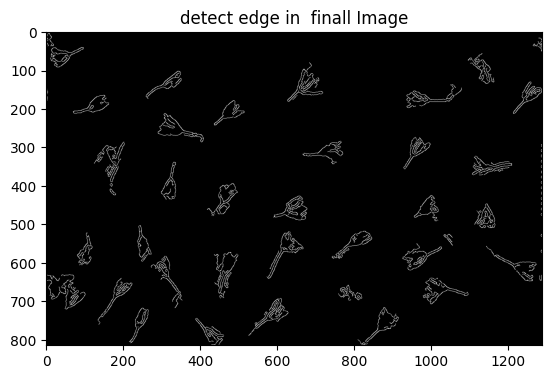

In [50]:
img_c = cv2.Canny(np.uint8(dnoise_image), 20, 130)
plt.imshow(img_c, cmap="gray")
plt.title("detect edge in  finall Image")
plt.show()

part c

3.141592653589793

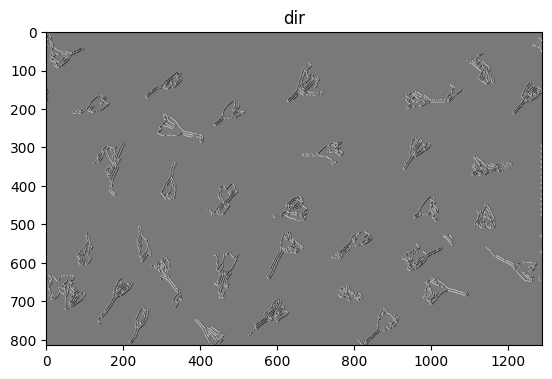

In [51]:
direc=np.zeros(img_c.shape)
gy = cv2.Sobel(img_c,cv2.CV_64F,0,1,ksize=3)
gx = cv2.Sobel(img_c,cv2.CV_64F,1,0,ksize=3)

size_img=len(direc)
a=len(direc[0])
for i  in range (size_img):
    for  j in range(a):
        direc[i,j]=math.atan2(gx[i,j],gy[i,j])
plt.title('dir')
plt.imshow(direc,cmap='gray')
np.max(direc)

Q5

PART A

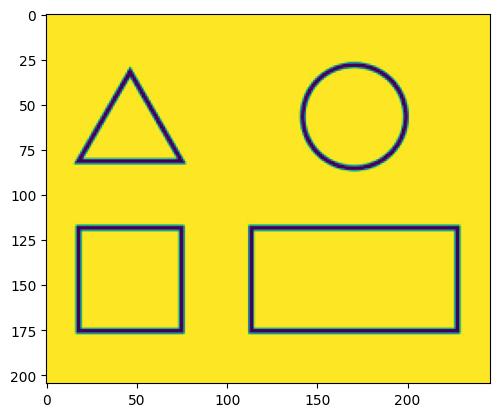

In [52]:
img1=cv2.imread('./images/Q7.png')
#for other page use cvtcolor and change channel 
img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

part b

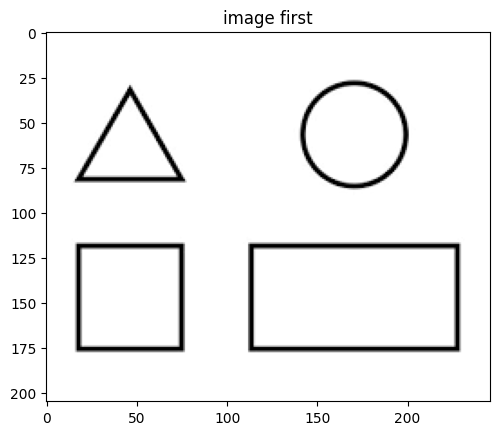

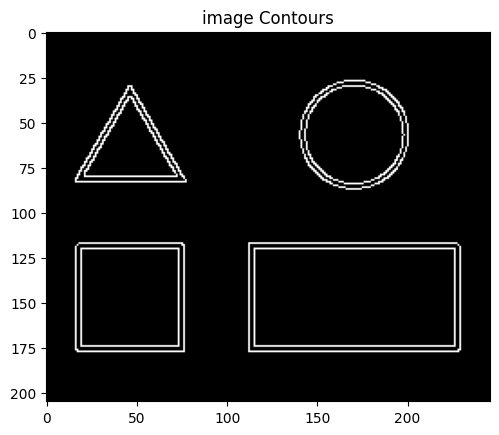

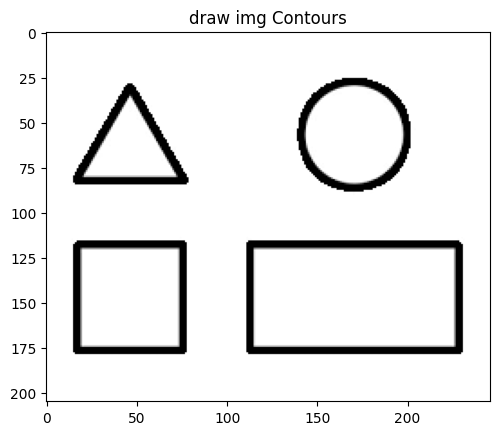

In [53]:
#with findcontours function find edge
#help sites:https://learnopencv.com/contour-detection-using-opencv-python-c/

nimg=img.copy()
img_c=cv2.Canny(img,100,250)
contours,hierarchy=cv2.findContours(img_c,cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=nimg, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2)

plt.imshow(img,cmap='gray')
plt.title('image first')
plt.show()

plt.imshow(img_c,cmap='gray')
plt.title('image Contours')
plt.show()

plt.imshow(nimg,cmap='gray')
plt.title('draw img Contours')
plt.show()

part c

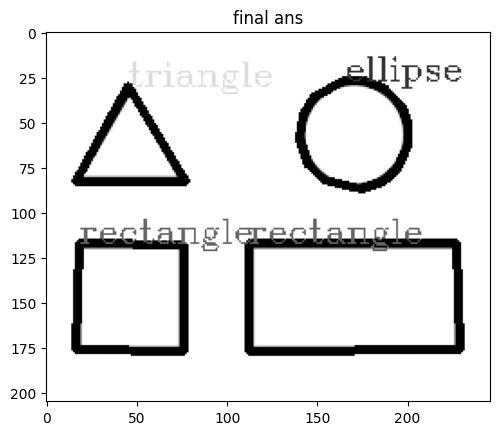

In [54]:
for i in contours:
    ep=0.01*cv2.arcLength(i,True)
    approx=cv2.approxPolyDP(i,ep,True)
    cv2.drawContours(img,[approx],0,(0),3)
#now write name of shape in image
    a,b=approx[0][0]
    ln=len(approx)
    if ln==3:
        cv2.putText(img,"triangle",(a,b),cv2.FONT_HERSHEY_COMPLEX,0.6,220,1)
    elif ln==4:
        cv2.putText(img,"rectangle",(a,b),cv2.FONT_HERSHEY_COMPLEX,0.6,100,1)
    elif ln==5:
        cv2.putText(img,"5 angles",(a,b),cv2.FONT_HERSHEY_COMPLEX,0.6,0,1)
    elif ln<15 and ln>6:
        cv2.putText(img,"ellipse",(a,b),cv2.FONT_HERSHEY_COMPLEX,0.6,50,1)
    else:
        cv2.putText(img,"circle",(a,b),cv2.FONT_HERSHEY_COMPLEX,0.6,100,1)
    
plt.imshow(img,cmap='gray')
plt.title("final ans")
plt.show()